In [1]:
import os
import sys
sys.path.append("./codes")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 100})  # 
%matplotlib notebook

In [2]:
import seaborn as sns
import pandas as pd
from pathlib import Path
from statsmodels.formula.api import ols
import statsmodels.api as sm

directory = Path.cwd() 
directory = directory.joinpath('prebuiltimages')
def my_saving_display(fig, directory, image_name, imageformat="pdf",
                      saving=False):
    """"Saving with personal function."""
    if saving is True:
        fig.savefig(directory.joinpath(image_name + '.' + imageformat),
                    
                    format=imageformat)

Importation des données Paris13 et Occitanie 

In [3]:
occ1 = pd.read_csv("Mesure_journaliere_Region_Occitanie_Polluants_Principaux.csv", sep="," , header=0 )
occ1.head()
occ2 = pd.read_csv("20190401_20200331-PA13_auto.csv", sep=";" , header=0)
occ2.head()

,date,heure,NO2,O3
0,NaN,NaN,microg/m3,microg/m3
1,01/04/2019,1.0,16,51
2,01/04/2019,2.0,16,48
3,01/04/2019,3.0,18,46
4,01/04/2019,4.0,21,40


On esseye de supprimer la premiere ligne car on sait en python le 1 represnete le 0

In [4]:
occ2 = occ2[occ2.date.isna()==False]

In [5]:
occ2.head()

,date,heure,NO2,O3
1,01/04/2019,1.0,16,51
2,01/04/2019,2.0,16,48
3,01/04/2019,3.0,18,46
4,01/04/2019,4.0,21,40
5,01/04/2019,5.0,36,24


On voit sur les données de Paris13 que la composition de NO2 est calcule chaque une heure  donc on va calculer la moyenne en jour.

In [6]:
occ2=occ2[occ2['NO2']!='n/d']
occ2['NO2']=occ2['NO2'].astype('float')
occ_PARIS13= occ2.groupby('date').agg({'NO2':'mean'})

In [7]:
occ_PARIS13.head()

,NO2
date,
01/01/2020,26.333333
01/02/2020,16.541667
01/03/2020,23.250000
01/04/2019,30.375000
01/05/2019,22.791667


In [8]:
occ1['date'] = pd.to_datetime(occ1['date_debut']).dt.to_period('M')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Vu qu'on a les donnes occitanie donc on voire  les communes qui lui compose dabords 

In [9]:
occ1.nom_com.unique()  

array(['MONTPELLIER', 'TOULOUSE', 'NIMES', 'BELESTA-EN-LAURAGAIS',
       'BIARS-SUR-CERE', 'PEYRUSSE-VIEILLE', 'MIRAMONT-DE-COMMINGES',
       'BESSIERES', 'BLAGNAC', 'LUNEL-VIEL', 'PERPIGNAN', 'CASTRES',
       'LOURDES', 'AGDE', 'TARBES', 'ALBI', 'SAINT-GELY-DU-FESC',
       'SAINT-GAUDENS', 'SAINT-ESTEVE', 'SAZE', 'LATTES', 'MONTGISCARD',
       'CORNEILHAN', 'SAINT-LAURENT-DES-ARBRES', 'LA CALMETTE', 'RODEZ',
       'CAUNES-MINERVOIS', 'MENDE', 'CARCASSONNE', 'ROQUEREDONDE',
       'VALLABREGUES'], dtype=object)

Comme notre etude porte sur la comparaisonn de montpellier et Paris13 portant notre exemple sur NO2 donc on doit donc 
lire seulement les données de monteplier d'ou ainsi 

In [10]:
df =occ1[occ1['nom_com']=='MONTPELLIER']

On tire seulement la composition de NO2 d'ou 

In [11]:
df =df[df['nom_poll']=='NO2']

In [12]:
df.head()

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,valeur,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date
0,3.87460,43.6050,HERAULT,MONTPELLIER,34172,Montpellier - Saint Denis Trafic,FR50202,Urbaine,Trafic,NO2,...,12.1,ug.m-3,journaliere,2020-01-19T01:00:00.000Z,2020-01-20T00:00:00.000Z,t,770633,6278830,5001,2020-01
40,3.87460,43.6050,HERAULT,MONTPELLIER,34172,Montpellier - Saint Denis Trafic,FR50202,Urbaine,Trafic,NO2,...,9.7,ug.m-3,journaliere,2020-04-11T01:00:00.000Z,2020-04-12T00:00:00.000Z,t,770633,6278830,5041,2020-04
56,3.86472,43.6117,HERAULT,MONTPELLIER,34172,Montpellier - Chaptal Urbain,FR50201,Urbaine,Fond,NO2,...,8.5,ug.m-3,journaliere,2020-04-11T01:00:00.000Z,2020-04-12T00:00:00.000Z,t,769827,6279565,5057,2020-04
169,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,NO2,...,14.6,ug.m-3,journaliere,2020-01-20T01:00:00.000Z,2020-01-21T00:00:00.000Z,t,771642,6277340,5170,2020-01
178,3.87460,43.6050,HERAULT,MONTPELLIER,34172,Montpellier - Saint Denis Trafic,FR50202,Urbaine,Trafic,NO2,...,19.6,ug.m-3,journaliere,2020-01-20T01:00:00.000Z,2020-01-21T00:00:00.000Z,t,770633,6278830,5179,2020-01


On observe dans le tableau que la date de debut et la date de fin on va inserer une aure colonne pour le jour 
car on va comparer la composition NO2 journaliere

In [13]:
df['jour']=[str(x)[:10] for x in df['date_debut']]

In [14]:
df.head()

,X,Y,nom_dept,nom_com,insee_com,nom_station,code_station,typologie,influence,nom_poll,...,unite,metrique,date_debut,date_fin,statut_valid,x_l93,y_l93,ObjectId,date,jour
0,3.87460,43.6050,HERAULT,MONTPELLIER,34172,Montpellier - Saint Denis Trafic,FR50202,Urbaine,Trafic,NO2,...,ug.m-3,journaliere,2020-01-19T01:00:00.000Z,2020-01-20T00:00:00.000Z,t,770633,6278830,5001,2020-01,2020-01-19
40,3.87460,43.6050,HERAULT,MONTPELLIER,34172,Montpellier - Saint Denis Trafic,FR50202,Urbaine,Trafic,NO2,...,ug.m-3,journaliere,2020-04-11T01:00:00.000Z,2020-04-12T00:00:00.000Z,t,770633,6278830,5041,2020-04,2020-04-11
56,3.86472,43.6117,HERAULT,MONTPELLIER,34172,Montpellier - Chaptal Urbain,FR50201,Urbaine,Fond,NO2,...,ug.m-3,journaliere,2020-04-11T01:00:00.000Z,2020-04-12T00:00:00.000Z,t,769827,6279565,5057,2020-04,2020-04-11
169,3.88689,43.5915,HERAULT,MONTPELLIER,34172,Montpellier - Prés d Arènes Urbain,FR50200,Urbaine,Fond,NO2,...,ug.m-3,journaliere,2020-01-20T01:00:00.000Z,2020-01-21T00:00:00.000Z,t,771642,6277340,5170,2020-01,2020-01-20
178,3.87460,43.6050,HERAULT,MONTPELLIER,34172,Montpellier - Saint Denis Trafic,FR50202,Urbaine,Trafic,NO2,...,ug.m-3,journaliere,2020-01-20T01:00:00.000Z,2020-01-21T00:00:00.000Z,t,770633,6278830,5179,2020-01,2020-01-20


On va calculer la moyenne de NO2 par jour comme on l'avait fait pour Paris13

In [15]:
occ_Montpellier = df.groupby('jour').agg({'valeur':'mean'})

In [16]:
occ_Montpellier.head()

,valeur
jour,
2019-04-21,16.625
2019-04-22,15.775
2019-04-23,27.275
2019-04-24,15.650
2019-04-25,15.350


In [17]:
occ_Montpellier.columns=['NO2']

In [18]:
occ_Montpellier.head()

,NO2
jour,
2019-04-21,16.625
2019-04-22,15.775
2019-04-23,27.275
2019-04-24,15.650
2019-04-25,15.350


Vu qu'on a les deux tabeaux en jour de NO2 donc on peut tracer des graphes pour 

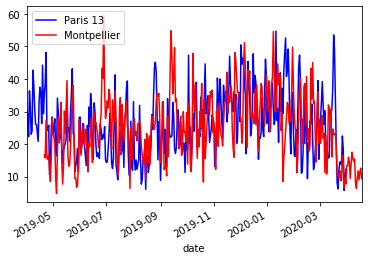

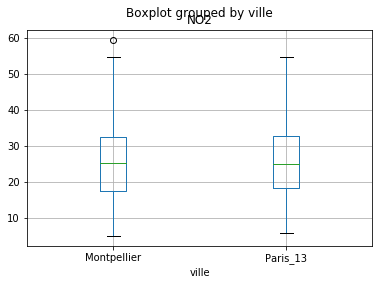

In [19]:
import datetime 
from datetime import datetime
occ_PARIS13['date'] = occ_PARIS13.index
occ_PARIS13['date'] = [ datetime.strptime(t, '%d/%m/%Y') for t in occ_PARIS13['date'].astype('str')]
occ_PARIS13['ville'] = 'Paris_13'
occ_PARIS13 = occ_PARIS13[['date', 'ville', 'NO2']]
occ_PARIS13

occ_Montpellier['date'] = occ_Montpellier.index
occ_Montpellier['date'] = [ datetime.strptime(t, '%Y-%m-%d') for t in occ_Montpellier['date'].astype('str')]
occ_Montpellier['ville'] = 'Montpellier'
occ_Montpellier = occ_Montpellier[['date', 'ville', 'NO2']]


df_final = pd.concat([occ_PARIS13, occ_Montpellier])
df_final = df_final.sort_values('date')
import matplotlib.pyplot as plt

# Line plot
ax = plt.gca()
df_final[df_final['ville'] == "Paris_13"].plot(kind='line',x='date',y='NO2',ax=ax, color = 'blue', label = 'Paris 13')
df_final[df_final['ville'] == "Montpellier"].plot(kind='line',x='date',y='NO2', color='red', ax=ax, label = 'Montpellier')
plt.show()

## Boxplot
df_final.boxplot('NO2', by = 'ville')


On constate que sur la figure1 la composition de NO2 est tentot plus important sur Montpellier Tentot sur Paris13 

In [20]:
results = ols('NO2 ~ ville', data=df_final).fit()

In [21]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
ville,36.290375,1.0,0.356588,0.550594
Residual,73784.027437,725.0,NaN,NaN


 ici nous constatons que le PR(>F) est egale à 0.55 soit 55% alors on peut dire la composition de dioxyde d'azote n'est pas significative.

In [22]:
df.date.unique()

<PeriodArray>
['2020-01', '2020-04', '2020-02', '2020-03', '2019-05', '2019-12', '2019-09',
 '2019-07', '2019-08', '2019-10', '2019-11', '2019-06', '2019-04']
Length: 13, dtype: period[M]

In [23]:
mont = df[df['nom_com'] == 'MONTPELLIER']

In [24]:
mont = mont[mont.date == '2020-04']

In [25]:
mont.code_station.unique()

array(['FR50202', 'FR50201', 'FR50203', 'FR50200'], dtype=object)